In [10]:
import pandas as pd
import numpy as np
import dask.dataframe as dd
data = pd.read_csv('final_animedataset.csv')
#chunk = pd.read_csv("./Anime dataset 2023/final_animedataset.csv", chunksize=1000000)
#df = pd.read_csv("final_animedataset.csv")
#for df in chunk:
#    break
#df = data.compute()
df = data
#df.head(5)

# Preview the first chunk
#first_chunk = next(df)
#print(first_chunk.head())
df[df["username"] == "Jony"]


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35305695 entries, 0 to 35305694
Data columns (total 13 columns):
 #   Column      Dtype  
---  ------      -----  
 0   username    object 
 1   anime_id    int64  
 2   my_score    int64  
 3   user_id     int64  
 4   gender      object 
 5   title       object 
 6   type        object 
 7   source      object 
 8   score       float64
 9   scored_by   int64  
 10  rank        float64
 11  popularity  int64  
 12  genre       object 
dtypes: float64(2), int64(5), object(6)
memory usage: 3.4+ GB
None

Sample Rows:

   username  anime_id  my_score  user_id  gender          title type source  \
0  karthiga        21         9  2255153  Female      One Piece   TV  Manga   
1  karthiga        59         7  2255153  Female        Chobits   TV  Manga   
2  karthiga        74         7  2255153  Female   Gakuen Alice   TV  Manga   
3  karthiga       120         7  2255153  Female  Fruits Basket   TV  Manga   
4  karthiga       

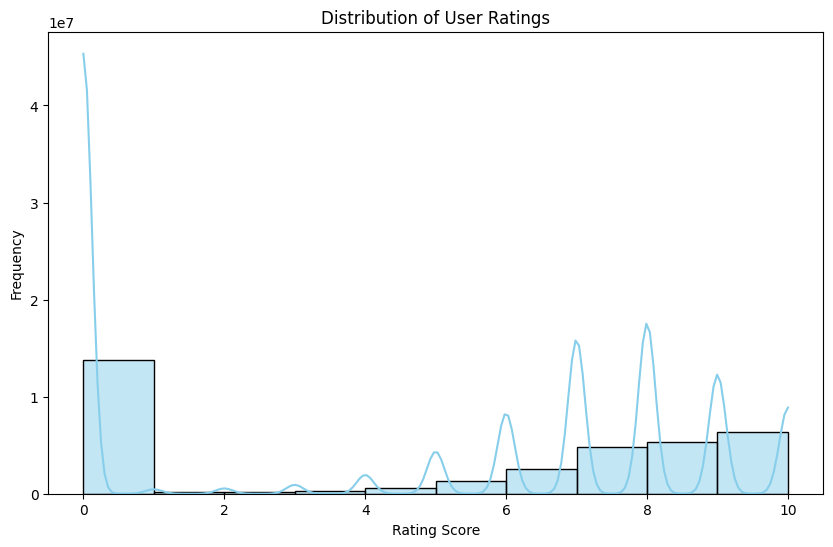

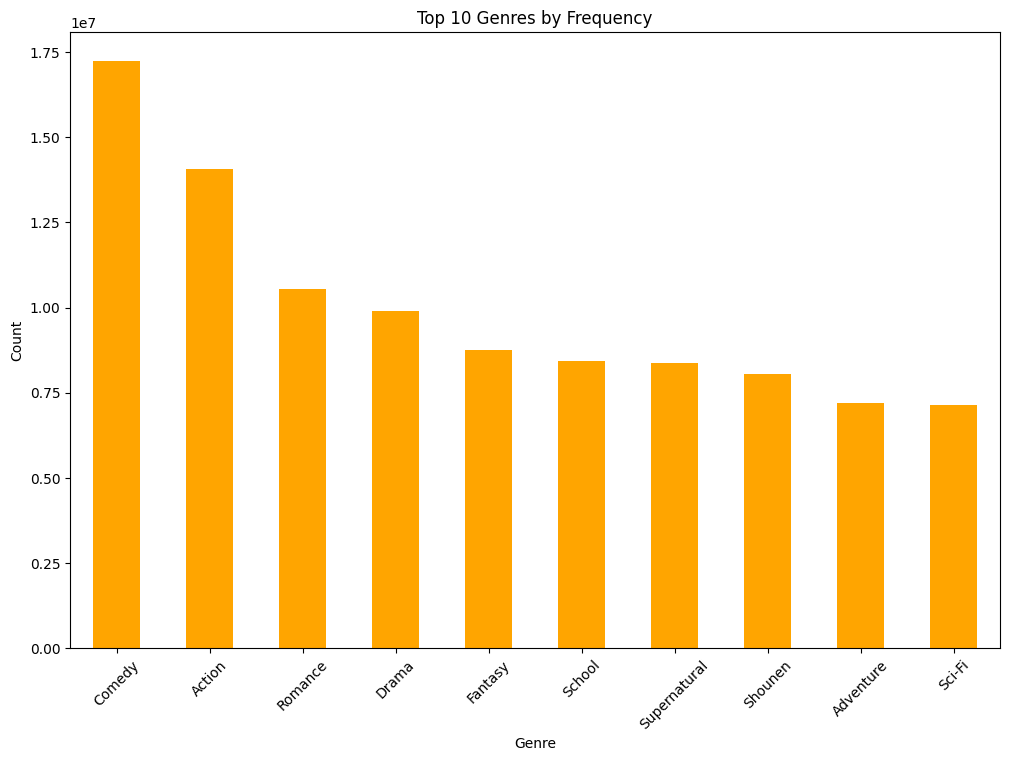

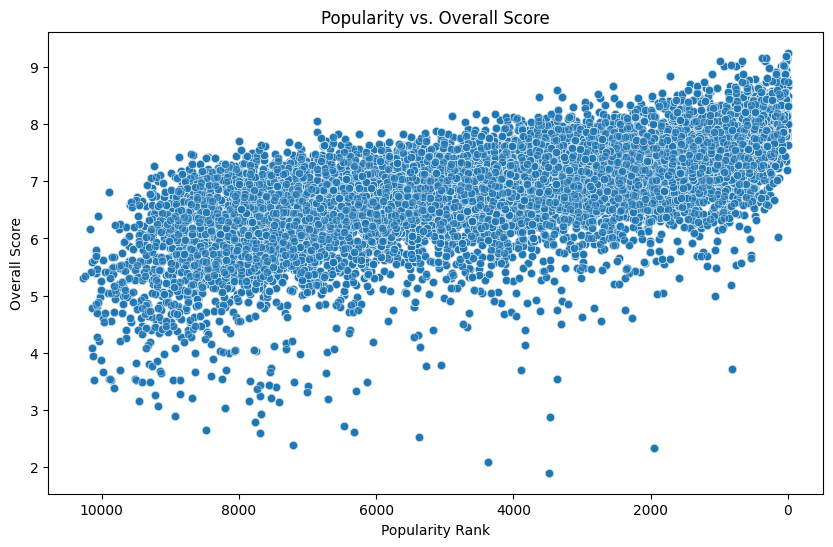


Average Score by Anime Type:

type
Movie      7.737372
TV         7.615486
Special    7.223882
OVA        7.099412
ONA        6.912536
Music      6.888400
Name: score, dtype: float64


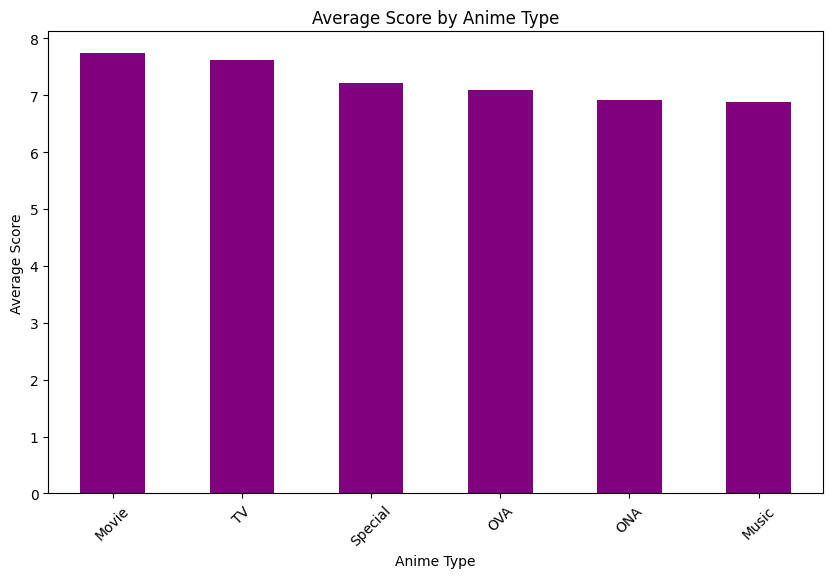


Cleaned dataset saved to 'cleaned_anime_dataset.csv'.


In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
# Adjust the path to your CSV file
file_path = 'final_animedataset.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Info:\n")
print(data.info())

# Display the first few rows
print("\nSample Rows:\n")
print(data.head())

# Check for missing values
print("\nMissing Values:\n")
print(data.isnull().sum())

# Drop rows with missing values in key columns (customize as needed)
data = data.dropna(subset=['my_score', 'score', 'popularity', 'genre'])

# Convert types where necessary (e.g., scored_by to integer if not already)
data['scored_by'] = pd.to_numeric(data['scored_by'], errors='coerce')

# Analyze Ratings Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['my_score'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of User Ratings')
plt.xlabel('Rating Score')
plt.ylabel('Frequency')
plt.show()

# Analyze Popular Genres
# Extract genres (assuming multiple genres are separated by commas)
all_genres = data['genre'].dropna().str.split(', ').explode()
genre_counts = all_genres.value_counts()

plt.figure(figsize=(12, 8))
genre_counts.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Genres by Frequency')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Relationship Between Popularity and Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='popularity', y='score', data=data, alpha=0.5)
plt.title('Popularity vs. Overall Score')
plt.xlabel('Popularity Rank')
plt.ylabel('Overall Score')
plt.gca().invert_xaxis()  # Lower rank is more popular
plt.show()

# Average Score by Anime Type
average_score_by_type = data.groupby('type')['score'].mean().sort_values(ascending=False)
print("\nAverage Score by Anime Type:\n")
print(average_score_by_type)

plt.figure(figsize=(10, 6))
average_score_by_type.plot(kind='bar', color='purple')
plt.title('Average Score by Anime Type')
plt.xlabel('Anime Type')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()

# Save cleaned data for further use
data.to_csv('cleaned_anime_dataset.csv', index=False)
print("\nCleaned dataset saved to 'cleaned_anime_dataset.csv'.")


In [2]:
df = df[df.my_score != 0]
#pd.Series(df["title"].unique()).to_csv('out.csv')

In [ ]:
print(df.shape)
genre = df['genre'].str.split(', ')
unique_genre = list({x for l in genre.dropna() for x in l})
df1 = pd.DataFrame(df)
for i in unique_genre:
    df1[i] = genre.map(lambda x: i in x, na_action="ignore")
print(df1.head(5))

In [3]:
a = df.groupby(["gender", "genre"], as_index = False).agg({"my_score": ["sum", "count"]})
a

gender                                             genre my_score  \
                                                                         sum   
0          Female                                            Action    62417   
1          Female                                 Action, Adventure    42024   
2          Female  Action, Adventure, Cars, Comedy, Sci-Fi, Shounen     1425   
3          Female                   Action, Adventure, Cars, Sci-Fi     1652   
4          Female                         Action, Adventure, Comedy      226   
...           ...                                               ...      ...   
10994  Non-Binary                             Supernatural, Shounen       87   
10995  Non-Binary                       Supernatural, Slice of Life       64   
10996  Non-Binary                                  Thriller, Sci-Fi     2313   
10997  Non-Binary                                           Vampire        9   
10998  Non-Binary                                              Yaoi       73   

             
      count  
0      8976  
1      5601  
2       204  
3       250  
4        42  
...     ...  
10994    14  
10995    11  
10996   270  
10997     3  
10998    13  

[10999 rows x 4 columns]

In [4]:

genre = a.genre.str.split(', ')
unique_genre = list({x for l in genre.dropna() for x in l})
unique_genre

['Fantasy',
 'Yaoi',
 'Josei',
 'Historical',
 'Dementia',
 'Hentai',
 'Comedy',
 'Seinen',
 'Psychological',
 'Samurai',
 'Mystery',
 'Cars',
 'Demons',
 'Slice of Life',
 'Shoujo',
 'Magic',
 'Sci-Fi',
 'Parody',
 'Thriller',
 'Space',
 'Action',
 'Horror',
 'Yuri',
 'Shoujo Ai',
 'Supernatural',
 'Drama',
 'Harem',
 'School',
 'Romance',
 'Super Power',
 'Shounen Ai',
 'Mecha',
 'Sports',
 'Vampire',
 'Military',
 'Adventure',
 'Ecchi',
 'Shounen',
 'Kids',
 'Police',
 'Music',
 'Game',
 'Martial Arts']

In [5]:
for i in unique_genre:
    a[i] = genre.map(lambda x: i in x, na_action="ignore")
print(a.head(5))

   gender                                             genre my_score        \
                                                                 sum count   
0  Female                                            Action    62417  8976   
1  Female                                 Action, Adventure    42024  5601   
2  Female  Action, Adventure, Cars, Comedy, Sci-Fi, Shounen     1425   204   
3  Female                   Action, Adventure, Cars, Sci-Fi     1652   250   
4  Female                         Action, Adventure, Comedy      226    42   

  Fantasy   Yaoi  Josei Historical Dementia Hentai  ... Vampire Military  \
                                                    ...                    
0   False  False  False      False    False  False  ...   False    False   
1   False  False  False      False    False  False  ...   False    False   
2   False  False  False      False    False  False  ...   False    False   
3   False  False  False      False    False  False  ...   False    False 

Text(0.5, 0, 'Genre')

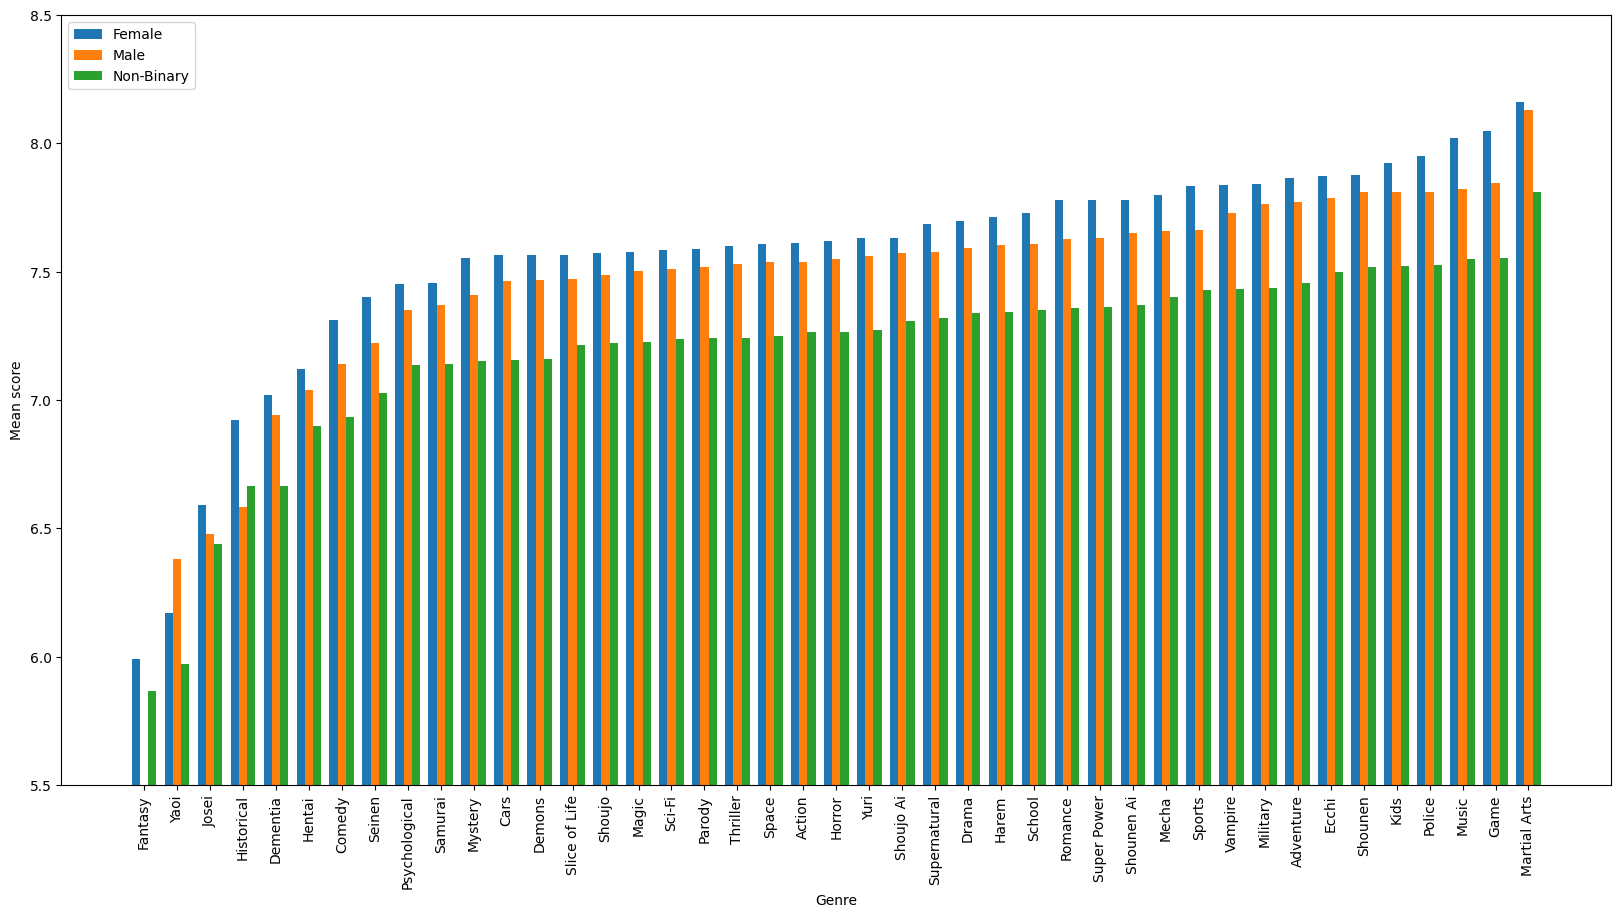

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
ax = plt.subplot(111)
bar_width = 0.25
index = np.arange(len(unique_genre))

for i, g in enumerate(["Female", "Male", "Non-Binary"]):
    genred = {}
    for genre in unique_genre:
        s = a.loc[(a["gender"]==g) & (a[genre]==True)]
        mean = s[("my_score", "sum")].sum() / s[("my_score", "count")].sum()
        genred[genre] = mean
    genred = {k: v for k, v in sorted(genred.items(), key=lambda item: item[1])}
    names = list(genred.keys())
    values = list(genred.values())
    ax.bar(index + i * bar_width, values, bar_width, label=g)

ax.set_ylim([5.5, 8.5])
ax.set_xticks(index + bar_width)
ax.set_xticklabels(unique_genre, rotation=90)
plt.legend(loc="upper left")
plt.ylabel("Mean score")
plt.xlabel("Genre")



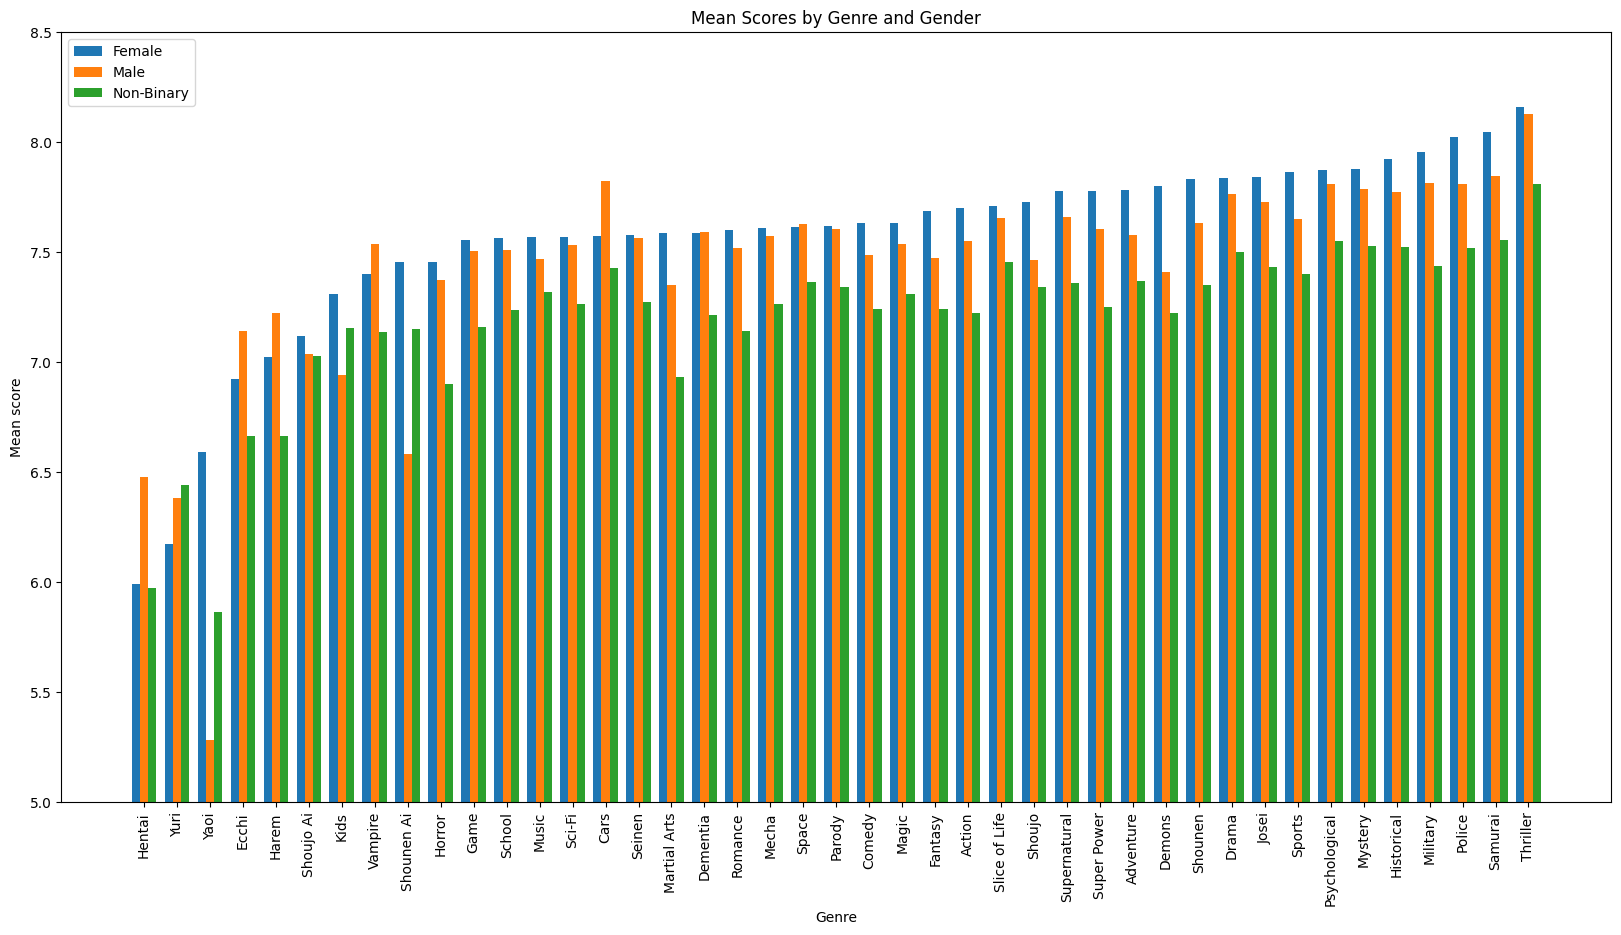

In [23]:
import numpy as np

import matplotlib.pyplot as plt

plt.style.use('default')  # Use default light mode style

plt.figure(figsize=(20, 10))
ax = plt.subplot(111)
bar_width = 0.25
index = np.arange(len(unique_genre))

# Calculate mean scores for each gender and genre
mean_scores = {"Female": {}, "Male": {}, "Non-Binary": {}}
for i, g in enumerate(["Female", "Male", "Non-Binary"]):
    for genre in unique_genre:
        s = a.loc[(a["gender"] == g) & (a[genre] == True)]
        mean = s[("my_score", "sum")].sum() / s[("my_score", "count")].sum()
        mean_scores[g][genre] = mean

# Sort genres by female mean score
sorted_genres = sorted(mean_scores["Female"].items(), key=lambda item: item[1])
sorted_genres = [genre for genre, score in sorted_genres]

# Plot the sorted genres
for i, g in enumerate(["Female", "Male", "Non-Binary"]):
    values = [mean_scores[g][genre] for genre in sorted_genres]
    ax.bar(index + i * bar_width, values, bar_width, label=g)

ax.set_ylim([5, 8.5])
ax.set_xticks(index + bar_width)
ax.set_xticklabels(sorted_genres, rotation=90)
plt.legend(loc="upper left")
plt.ylabel("Mean score")
plt.xlabel("Genre")
plt.title("Mean Scores by Genre and Gender")
plt.show()

In [ ]:
#Check if there are mismatches among the same anime. Takes forever to run.(7700k 7:40 min)
#for title in df1["title"].unique():
#    genre_val = df1[df1["title"]==title][unique_genre].sum()
#    if (np.unique(genre_val).size > 2):
#        print("Theres genre mismatch for title", title)
def unique_cols(df):
    a = df.to_numpy() # df.values (pandas<0.24)
    return (a[0] == a).all(0)
for n, title in enumerate(df["title"].unique()):
    print(n, unique_cols(df[df["title"]==title][["title", "popularity", "rank", "scored_by", "score", "source", "type"]]))


In [ ]:
sex = (df1["Hentai"]==True) | (df1["Ecchi"]==True) | (df1["Harem"]==True) | (df1["Yaoi"]==True)
print(df1.loc[sex & (df1["gender"]=="Male")]["my_score"].mean())
print(df1.loc[sex & (df1["gender"]=="Male")]["my_score"].std())
print(df1.loc[sex & (df1["gender"]=="Female")]["my_score"].mean())
print(df1.loc[sex & (df1["gender"]=="Female")]["my_score"].std())

In [ ]:
best = ("", 0)
for title in df1.loc[sex]["title"].unique():
    score = df1.loc[sex & (df1["title"]==title)]["score"].mean()
    if score > best[1]:
        best = (title, score)
    print(title, score)
print("Best sex", best)

In [ ]:
pd.set_option('display.max_columns', None)
df1.loc[df1["title"]==best[0]].head(1)

In [ ]:
df1.loc[df1["Music"]==True]["title"].unique()

In [ ]:
df1.loc[df1["title"]=="Stein"]["my_score"]

In [ ]:

best_dementia = ("", 0)
for title in df1.loc[df1["Dementia"]==True]["title"].unique():
    score = df1.loc[df1["title"]==title]["score"].mean()
    if score > best_dementia[1]:
        best_dementia = (title, score)
    print(title, score)
print("Best dementia", best_dementia)

In [ ]:
import matplotlib.pyplot as plt
title_genre_count = []
for i in unique_genre:
    title_genre_count.append(df.loc[df1[i]==True]["title"].unique().size)
k = pd.DataFrame({"genre":unique_genre, "count":title_genre_count}).sort_values("count", ascending=False)
plt.bar(k["genre"],k["count"]/df1["title"].unique().size, width=0.5)
plt.xticks(rotation=90)

In [ ]:
df_zero = df_orig[df_orig.my_score == 0]
z = df_zero.groupby(["title"]).agg({"score": ["first"], "popularity": ["first"], "scored_by": ["first"], "username": ["count"]})
a = df_orig.groupby(["title"]).agg({"username": ["count"]})
z["total"] = a["username"]
z["%"]=z["username"]/a["username"]


In [ ]:
ax = z["%"].hist(bins=100, density=1)
ax.set_ylabel("Density")
ax.set_xlabel("Rating loss")
z.sort_values("%", ascending=False)

In [ ]:
#a = (z["scored_by"])["first"]
a = (z["popularity"])["first"]
print(a)
ax = z.plot("%", "score", kind="scatter", c=a, cmap='inferno_r')
ax.set_ylabel("Rating score")
ax.set_xlabel("Rating loss")
cbar = plt.gcf().get_axes()[1]
cbar.invert_yaxis()
cbar.set_ylabel("Popularity rank")
z.sort_values("total", ascending=False)

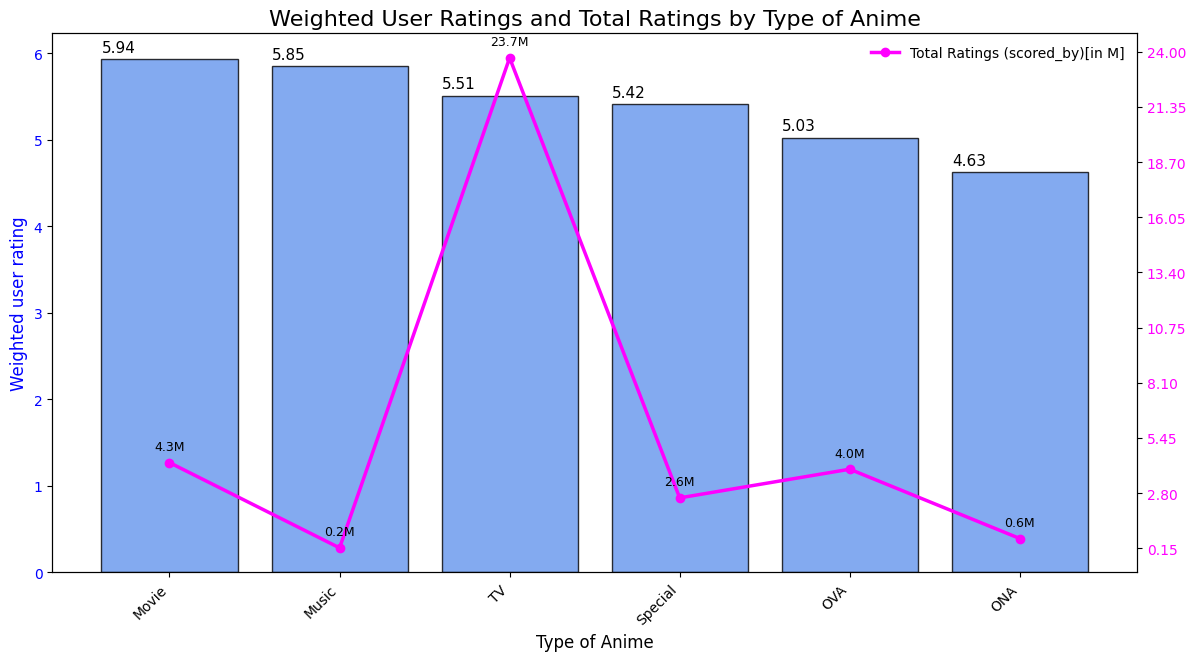

In [40]:
import matplotlib.pyplot as plt
type_scores_correlation = df.groupby('type').apply(
    lambda x: (x['my_score'] * x["scored_by"]).sum() / x['scored_by'].sum(), include_groups=False
).sort_values(ascending=False)

type_ratings = df.groupby('type').agg({"scored_by": ["count"]})["scored_by"]["count"]
#print(f"type_ratings: {type_ratings[:5]}")

#plt.ticklabel_format(style='plain', axis='y')
fig, ax1 = plt.subplots(figsize=(14, 7))

#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))


bars = ax1.bar(type_scores_correlation.index, type_scores_correlation, 
               color='cornflowerblue', alpha=0.8, label='Weighted My Score', edgecolor='black')
ax1.set_xlabel('Type of Anime', fontsize=12)
ax1.set_ylabel('Weighted user rating', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue', labelsize=10)
ax1.set_xticks(type_scores_correlation.index)
ax1.set_xticklabels(type_scores_correlation.index, rotation=45, ha='right', fontsize=10)


for bar in bars:
    ax1.text(bar.get_x() + 0.2, bar.get_height() + 0.05,
             f'{bar.get_height():.2f}', ha='right', va='bottom', fontsize=11, color='black')

# Line plot for Total Ratings
ax2 = ax1.twinx()
adjusted_total_ratings = type_ratings[type_scores_correlation.index] / 1e6  # Convert to millions
line = ax2.plot(adjusted_total_ratings, 
                color='magenta', marker='o', label='Total Ratings (scored_by)[in M]', linewidth=2.5)
#line, = ax2.plot(type_ratings[type_scores_correlation.index], 
#                 color='magenta', marker='o', label='Total Ratings (scored_by)', linewidth=2.5)

#ax2.set_ylabel('Total Ratings', color='magenta', fontsize=12)
#ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='magenta', labelsize=10)
ax2.set_yticks(np.linspace(start=0.15, stop=24, num=10))
#ax2.ticklabel_format(style = 'plain')
#ax2.set_ylim(bottom=1_000, top=1.5e7)


for i, value in enumerate(adjusted_total_ratings):
    ax2.text(i, value + adjusted_total_ratings.max() * 0.025, f'{value:.1f}M', color='k', ha='center', fontsize=9)


ax2.legend(loc='upper right', frameon=False, fontsize=10)

#fig.suptitle('Weighted User Ratings and Total Ratings by Type of Anime', fontsize=14)
plt.title('Weighted User Ratings and Total Ratings by Type of Anime', fontsize=16)
#fig.tight_layout(rect=[0, 0, 0.85, 1]) 
#plt.subplots_adjust(right=0.8)

#plt.savefig('type_ratings.png')
plt.show()

In [45]:
df["scored_by"].iloc[215]
df['my_score'].iloc[2] * df["scored_by"].iloc[2]

np.int64(232708)